In [3]:
# Prettymaps
from prettymaps import *
# Vsketch
# import vsketch
# OSMNX
import osmnx as ox
# Matplotlib-related
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from descartes import PolygonPatch
# Shapely
from shapely.geometry import *
from shapely.affinity import *
from shapely.ops import unary_union

/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:317: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and 

/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:222: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
/usr/local/lib/python3.9/site-packages/prettymaps/fetch.py:222: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  multipolys = reduce(lambda x,y: x+y, [list(x) for x in multipolys]) if len(multipolys) > 0 else []
/usr/local/lib/python3.9/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

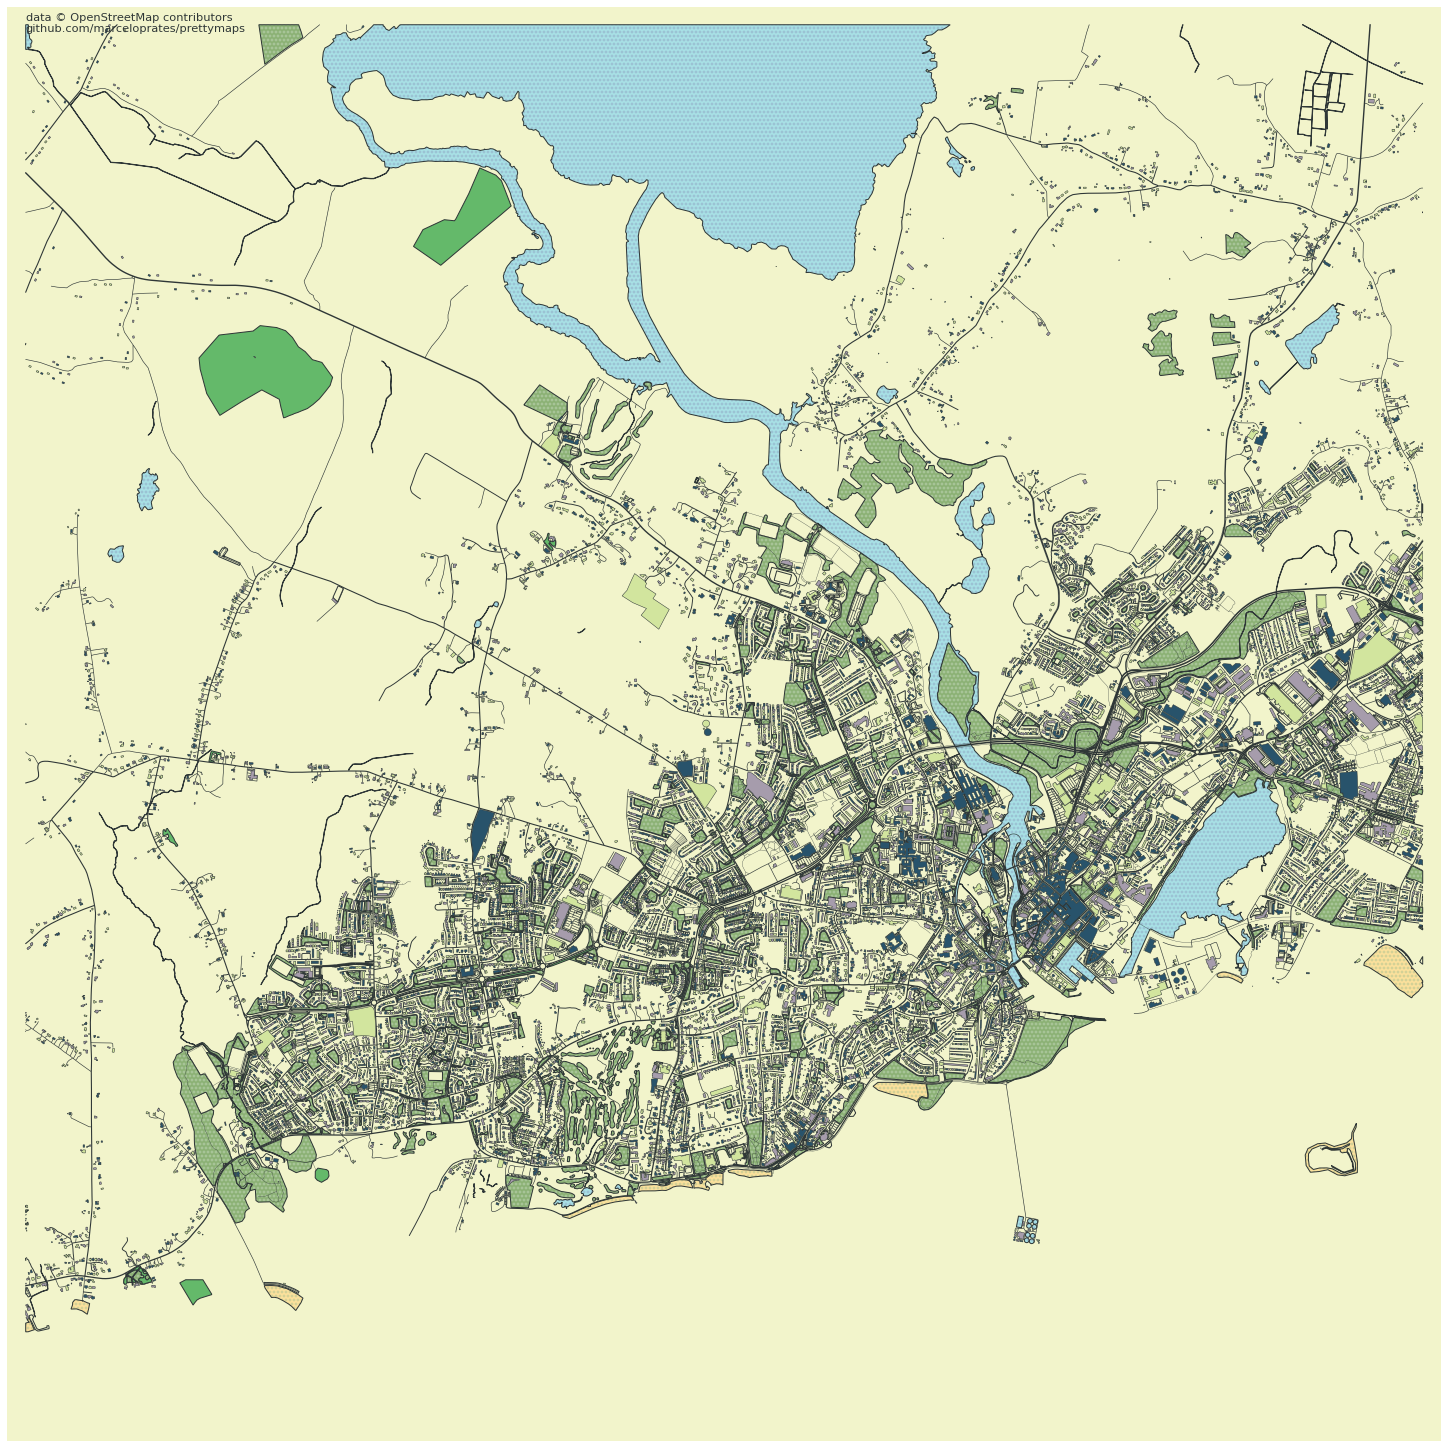

In [8]:
fig, ax = plt.subplots(figsize = (20, 20), constrained_layout = True)
palette = ['#28536B','#A69CAC','#D2E59E']
dilate = 0
background_c = '#F2F4CB'
layers = plot(
  #Centre the map center at 
  (53.2839064,-9.0837657),
  #Set radius for the map
  radius = 4500,
  ax=ax,
  #Name and select the various layers we want on the map
  #We want a square map so ensure that we're not querying for data in a circle
  layers = {
      #we want a square layout, so 
      'perimeter': {},
            'streets': {
                'width': {
                    'motorway': 5,
                    'trunk': 5,
                    'primary': 4.5,
                    'secondary': 4,
                    'tertiary': 3.5,
                    'cycleway': 3.5,
                    'residential': 3,
                    'service': 2,
                    'unclassified': 2,
                    'pedestrian': 2,
                    'footway': 1,
                },
                'circle': False, 'dilate': dilate
            },
            'building': {'tags': {'building': True, 'landuse': 'construction'}, 'union': True, 'circle': False, 'dilate': dilate},
            'water': {
                'tags':{
                    'waterway': True,
                    'water': True,
                    'harbour': True,
                    'marina': True,
                    'bay': True,
                    'river': True
                }, 
                'circle': False, 'dilate': dilate
            },
            'forest': {'tags': {'landuse': 'forest'}, 'circle': False, 'dilate': dilate},
            'green': {'tags': {'landuse': ['grass', 'orchard'], 'natural': ['island', 'wood'], 'leisure': 'park'}, 'circle': False, 'dilate': dilate},
            'beach': {'tags': {'natural': 'beach'}, 'circle': False, 'dilate': dilate},
            'parking': {'tags': {'amenity': 'parking', 'highway': 'pedestrian', 'man_made': 'pier'}, 'circle': False}
        },
        drawing_kwargs = {
            'perimeter': {'fill': False, 'lw': 0, 'zorder': 0},
            'background': {'fc': background_c, 'zorder': -1},
            'green': {'fc': '#8BB174', 'ec': '#2F3737', 'hatch_c': '#A7C497', 'hatch': 'ooo...', 'lw': 1, 'zorder': 1},
            'forest': {'fc': '#64B96A', 'ec': '#2F3737', 'lw': 1, 'zorder': 2},
            'water': {'fc': '#a8e1e6', 'ec': '#2F3737', 'hatch_c': '#9bc3d4', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'beach': {'fc': '#FCE19C', 'ec': '#2F3737', 'hatch_c': '#d4d196', 'hatch': 'ooo...', 'lw': 1, 'zorder': 3},
            'parking': {'fc': background_c, 'ec': '#2F3737', 'lw': 1, 'zorder': 3},
            'streets': {'fc': '#2F3737', 'ec': '#475657', 'alpha': 1, 'lw': 0, 'zorder': 4},
            'building': {'palette': palette, 'ec': '#2F3737', 'lw': .5, 'zorder': 5},
            
        },

        osm_credit = {'color': '#2F3737'}
)

# Set bounds
#xmin, ymin, xmax, ymax = layers['perimeter'].bounds
#dx, dy = xmax-xmin, ymax-ymin
#a = .2
#ax.set_xlim(xmin+a*dx, xmax-a*dx)
#ax.set_ylim(ymin+a*dy, ymax-a*dy)

#ax.text(
   #xmax-.35*dx, ymax+.02*dy,
    #"Kowloon Peninsula & Hong Kong Island",
    #color = '#2F3737',
    #fontproperties = fm.FontProperties(fname = '../assets/Permanent_Marker/PermanentMarker-Regular.ttf', size = 20),
#)

#Export a copy
plt.savefig('galway.png')